In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns

In [2]:
def mutate(base):
    
    bases = ['A', 'C', 'G', 'T']
    bases.remove(base)
    
    mut_base = np.random.choice(bases)
    return mut_base

## H37Rv sequence

In [3]:
h37rv_fasta = "/n/data1/hms/dbmi/farhat/mtb_data/h37rv/h37rv.fna"
with open(h37rv_fasta, "r") as in_f:
    header = in_f.readline()
    
    line = in_f.readline()
    h37rv_seq = line.strip()
    while line:
        line = in_f.readline()
        h37rv_seq += line.strip()

In [4]:
header

'>NC_000962.3\n'

In [5]:
len(h37rv_seq)

4411532

## DR mutation dataframe

### Create list of mutations to make

Change 1-index to 0-index

In [6]:
dr_mutations = pd.read_csv("/home/sm624/data/antib_resistance/WHO_drug_SNP_mapping.csv")
print(dr_mutations.shape)
dr_mutations.head()

(513, 7)


,gene_name,gene_locus,variant,codon_number,genome_index,nt_change,drug
0,gyrB,Rv0005,gyrB_D461N,461.0,6620,A,LEVO
1,gyrB,Rv0005,gyrB_D461N,461.0,6620,A,MOXI
2,gyrB,Rv0005,gyrB_N499D,499.0,6734,G,LEVO
3,gyrB,Rv0005,gyrB_N499D,499.0,6734,G,MOXI
4,gyrB,Rv0005,gyrB_E501V,501.0,6741,T,LEVO


In [7]:
DR_subst_ix_base_list = []

for i in dr_mutations.index:
    
    pos_base = (dr_mutations.loc[i, "genome_index"]-1, dr_mutations.loc[i, "nt_change"])
    
    if pos_base not in DR_subst_ix_base_list:
        DR_subst_ix_base_list.append(pos_base)
        
len(DR_subst_ix_base_list)

409

## H37Rv summary

In [8]:
h37rv_summary = pd.read_csv("/n/data1/hms/dbmi/farhat/mtb_data/mycobrowser/h37rv_mycobrowser_genome_summary.csv")
h37rv_summary.head()

,gene_id,gene_name,chrom_start,chrom_stop,strand,gene_category_vargas2021,feature,function,product,functional_category,PFAM,gene_ontology,dr_mutations
0,Rv0001,dnaA,1,1524,+,Essential,CDS,Plays an important role in the initiation and ...,Chromosomal replication initiator protein DnaA,information pathways,P49993,"GO:0003688,GO:0006270,GO:0005737,GO:0017111,GO...",NaN
1,Rv0002,dnaN,2052,3260,+,Non-Essential,CDS,"DNA polymerase III is a complex, multichain en...",DNA polymerase III (beta chain) DnaN (DNA nucl...,information pathways,Q50790,"GO:0003677,GO:0006260,GO:0003887,GO:0005737,GO...",NaN
2,Rv0003,recF,3280,4437,+,Non-Essential,CDS,The RECF protein is involved in DNA metabolism...,DNA replication and repair protein RecF (singl...,information pathways,Q59586,"GO:0006281,GO:0006260,GO:0009432,GO:0005737,GO...",NaN
3,Rv0004,Rv0004,4434,4997,+,Non-Essential,CDS,Function unknown,Conserved hypothetical protein,conserved hypotheticals,P71573,NaN,NaN
4,Rv0005,gyrB,5240,7267,+,Antibiotic Resistance,CDS,DNA gyrase negatively supercoils closed circul...,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,information pathways,P0C5C5,"GO:0003918,GO:0006265,GO:0005524",FLQ


## Homopolymer regions

### Subset Vargas et al. list and add Rv0678 HT

In [29]:
homopolymer_df = pd.read_csv("/home/sm624/data/homopolymers/vargas_2023_supplement3_annotated.csv")
homopolymer_df.head()

,H37Rv Start,H37Rv End,polyNT,Locus Tag,Gene Symbol,Homoplasy Score,# Alternate,resistance_assocation,resistance_association_source
0,976897,976906,GGGGGGGGG,Rv0878c,PPE13,2317,8351,NaN,NaN
1,854252,854261,CCCCCCCCC,inter_Rv0759c_Rv0760c,inter_Rv0759c_Rv0760c,776,28077,Y,(Vargas et al. 2023)
2,976889,976896,TTTTTTTT,Rv0878c,PPE13,771,5641,NaN,NaN
3,1992323,1992331,CCCCCCCC,Rv1759c,wag22,578,4052,NaN,NaN
4,2338194,2338202,CCCCCCCC,Rv2081c,Rv2081c,360,4596,NaN,NaN


In [30]:
homopolymer_DR_af = homopolymer_df[homopolymer_df.resistance_assocation == "Y"].drop(["Homoplasy Score", "# Alternate"], axis=1)
homopolymer_DR_af.reset_index(drop=True, inplace=True)
print(homopolymer_DR_af.shape)
homopolymer_DR_af.tail()

(17, 7)


,H37Rv Start,H37Rv End,polyNT,Locus Tag,Gene Symbol,resistance_assocation,resistance_association_source
12,3450182,3450189,CCCCCCC,Rv3084,lipR,Y,(Vargas et al. 2023)
13,3832356,3832363,GGGGGGG,Rv3413c,Rv3413c,Y,(Vargas et al. 2023)
14,1852176,1852183,TTTTTTT,inter_Rv1640c_Rv1641,inter_lysX_infC,Y,(Vargas et al. 2023)
15,912694,912701,CCCCCCC,inter_Rv0819_Rv0820,inter_mshD_phoT,Y,(Vargas et al. 2023)
16,794672,794679,AAAAAAA,inter_Rv0694_Rv0695,inter_Rv0694_Rv0695,Y,(Vargas et al. 2023)


In [16]:
h37rv_summary[h37rv_summary.gene_id == "Rv0678"]

,gene_id,gene_name,chrom_start,chrom_stop,strand,gene_category_vargas2021,feature,function,product,functional_category,PFAM,gene_ontology,dr_mutations
690,Rv0678,Rv0678,778990,779487,+,Non-Essential,CDS,Function unknown,Conserved protein,conserved hypotheticals,NaN,NaN,NaN


In [17]:
rv0678_seq = "GTGAGCGTCAACGACGGGGTCGATCAGATGGGCGCCGAGCCCGACATCATGGAATTCGTCGAACAGATGGGCGGCTATTTCGAGTCCAGGAGTTTGACTCGGTTGGCGGGTCGATTGTTGGGCTGGCTGCTGGTGTGTGATCCCGAGCGGCAGTCCTCGGAGGAACTGGCGACGGCGCTGGCGGCCAGCAGCGGGGGGATCAGCACCAATGCCCGGATGCTGATCCAATTTGGGTTCATTGAGCGGCTCGCGGTCGCCGGGGATCGGCGCACCTATTTCCGGTTGCGGCCCAACGCTTTCGCGGCTGGCGAGCGTGAACGCATCCGGGCAATGGCCGAACTGCAGGACCTGGCTGACGTGGGGCTGAGGGCGCTGGGCGACGCCCCGCCGCAGCGAAGCCGACGGCTGCGGGAGATGCGGGATCTGTTGGCATATATGGAGAACGTCGTCTCCGACGCCCTGGGGCGATACAGCCAGCGAACCGGAGAGGACGACTGA"
rv0678_seq.find("GGGGGG")

192

In [36]:
h37rv_seq[778990+192-1:778990+192+5]

'GGGGGG'

In [37]:
778990+192-1,778990+192+5

(779181, 779187)

In [38]:
homopolymer_DR_af.loc[17] = [779181, 779187, "GGGGGG", "Rv0678", "Rv0678", "Y", "(Xu et al. 2023)"]

In [39]:
homopolymer_DR_af.tail()

,H37Rv Start,H37Rv End,polyNT,Locus Tag,Gene Symbol,resistance_assocation,resistance_association_source
13,3832356,3832363,GGGGGGG,Rv3413c,Rv3413c,Y,(Vargas et al. 2023)
14,1852176,1852183,TTTTTTT,inter_Rv1640c_Rv1641,inter_lysX_infC,Y,(Vargas et al. 2023)
15,912694,912701,CCCCCCC,inter_Rv0819_Rv0820,inter_mshD_phoT,Y,(Vargas et al. 2023)
16,794672,794679,AAAAAAA,inter_Rv0694_Rv0695,inter_Rv0694_Rv0695,Y,(Vargas et al. 2023)
17,779181,779187,GGGGGG,Rv0678,Rv0678,Y,(Xu et al. 2023)


In [40]:
h37rv_seq[779181:779187], h37rv_seq[794672:794679]

('GGGGGG', 'AAAAAAA')

In [41]:
homopolymer_DR_af.to_csv("./h37rv_modification/DR_homopolymers.csv", index=False)

### Create list of mutations to make

In [2]:
homopolymer_DR_af = pd.read_csv("./h37rv_modification/DR_homopolymers.csv")
homopolymer_DR_af.head()

,H37Rv Start,H37Rv End,polyNT,Locus Tag,Gene Symbol,resistance_assocation,resistance_association_source
0,854252,854261,CCCCCCCCC,inter_Rv0759c_Rv0760c,inter_Rv0759c_Rv0760c,Y,(Vargas et al. 2023)
1,4139183,4139190,CCCCCCC,Rv3696c,glpK,Y,"(Safi et al. 2019),(Vargas et al. 2023)"
2,364498,364505,GGGGGGG,inter_Rv0301_Rv0302,inter_vapC2_Rv0302,Y,(Vargas et al. 2023)
3,4358979,4358986,GGGGGGG,Rv3879c,espK,Y,(Vargas et al. 2023)
4,36470,36477,CCCCCCC,Rv0032,bioF2,Y,(Vargas et al. 2023)


In [3]:
homopolymer_DR_af.shape

(18, 7)

In [10]:
HT_insert_ix_base_list = []

for i in homopolymer_DR_af.index:
    
    insert_ix, base = homopolymer_DR_af.loc[i, "H37Rv Start"], homopolymer_DR_af.loc[i, "polyNT"][0]
    h37rv_ix = insert_ix
    
    HT_insert_ix_base_list.append((insert_ix, h37rv_ix, base))

## Low mappability regions

### Pick regions for which EBR < 0.8 and pileup_map < 0.8

In [28]:
map_scores = pd.read_csv("/home/sm624/data/low_mappability_regions/AF17_H37Rv_PileupMappability_K50_E4.bedgraph", sep="\t",
                             names=["chrom","start","stop","score"])
print(map_scores.shape)
map_scores.head(), map_scores.tail()

(71935, 4)


(         chrom  start  stop  score
 0  NC_000962.3      0     0    NaN
 1  NC_000962.3      0     1    NaN
 2  NC_000962.3      1     2    NaN
 3  NC_000962.3      2     3    NaN
 4  NC_000962.3      3     4    NaN,
              chrom    start     stop  score
 71930  NC_000962.3  4411527  4411528    NaN
 71931  NC_000962.3  4411528  4411529    NaN
 71932  NC_000962.3  4411529  4411530    NaN
 71933  NC_000962.3  4411530  4411531    NaN
 71934  NC_000962.3  4411531  4411532    NaN)

In [29]:
all_map_scores = {}
for i in map_scores.index[1:]:
    start = map_scores.loc[i, "start"]
    stop = map_scores.loc[i, "stop"]
    for pos in range(start, stop):
        all_map_scores[pos] = map_scores.loc[i, "score"]
len(all_map_scores)

4411532

In [30]:
ebr_scores = pd.read_csv("/home/sm624/data/low_mappability_regions/AF18_H37Rv_EBR_36CI.bedgraph", sep="\t",
                        names=["chrom","start","stop","score"])
print(ebr_scores.shape)
ebr_scores.head(), ebr_scores.tail()

(21613, 4)


(         chrom  start  stop     score
 0  NC_000962.3      0     8  0.916667
 1  NC_000962.3      8    26  0.944444
 2  NC_000962.3     26    33  0.972222
 3  NC_000962.3     33   174  1.000000
 4  NC_000962.3    174   185  0.972222,
              chrom    start     stop     score
 21608  NC_000962.3  4390134  4411370  1.000000
 21609  NC_000962.3  4411370  4411400  0.972222
 21610  NC_000962.3  4411400  4411469  1.000000
 21611  NC_000962.3  4411469  4411471  0.972222
 21612  NC_000962.3  4411471  4411532  1.000000)

In [31]:
all_ebr_scores = {}
for i in ebr_scores.index:
    start = ebr_scores.loc[i, "start"]
    stop = ebr_scores.loc[i, "stop"]
    for pos in range(start, stop):
        all_ebr_scores[pos] = ebr_scores.loc[i, "score"]
len(all_ebr_scores)

4411532

In [38]:
# all 0-indexed

mappability_scores, ebr_scores = [], []

for pos in range(0, 4411532):
        
    mappability_scores.append(all_map_scores[pos])
    ebr_scores.append(all_ebr_scores[pos])
    

In [39]:
np.count_nonzero(mappability_scores), np.count_nonzero(ebr_scores)

(4411532, 4408913)

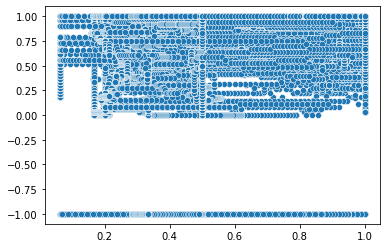

In [40]:
fig, ax = plt.subplots()

sns.scatterplot(x=mappability_scores, y=ebr_scores)

plt.show()

In [64]:
low_mappability_df = pd.DataFrame(columns=["start", "stop"])
df_i = 0

window_size = 300
jump_size = 150
window_size_i = window_size

for pos in range(0, 4411532, jump_size):
    
    if pos > window_size/2-1 and pos < 4411532-window_size/2:
        
        window_start, window_stop = pos-window_size/2, pos+window_size/2
        window_size_i = window_size
            
    elif pos >= 4411532-window_size/2:
        
        window_start, window_stop = pos-window_size/2, 4411532
        window_size_i = len(np.arange(window_start, window_stop))
        
    window_pos = np.arange(window_start, window_stop)
        
    window_map_scores = np.array([all_map_scores[x] for x in window_pos])
    window_ebr_scores = np.array([all_ebr_scores[x] for x in window_pos])

    if sum((-0.01 < window_map_scores) & (window_map_scores < 0.8)) == window_size_i and sum((-0.01 < window_ebr_scores) & (window_ebr_scores < 0.8)) == window_size_i:
        low_mappability_df.loc[df_i] = [int(window_start), int(window_stop)]
        df_i += 1
        
                
        

In [65]:
print(low_mappability_df.shape)
low_mappability_df.head()

(156, 2)


,start,stop
0,103950,104250
1,104100,104400
2,104250,104550
3,104400,104700
4,400500,400800


In [66]:
low_mappability_df.to_csv("./h37rv_modification/low_mappability_regions.csv", index=False)

### Create list of mutations to make

In [11]:
low_mappability_df = pd.read_csv("./h37rv_modification/low_mappability_regions.csv")
print(low_mappability_df.shape)
low_mappability_df.head()

(156, 2)


,start,stop
0,103950,104250
1,104100,104400
2,104250,104550
3,104400,104700
4,400500,400800


In [12]:
lowmap_subst_ix_list = []
for i in low_mappability_df.index:
    start, stop = low_mappability_df.loc[i, "start"], low_mappability_df.loc[i, "stop"]
    lowmap_subst_ix_list += list(np.arange(start, stop))
print(len(lowmap_subst_ix_list))

46800


### Previous low mappability definition

In [18]:
low_map_regions = pd.read_csv("/home/sm624/data/low_mappability_regions/AF17_H37Rv_PileupMappability_K50_E4.bedgraph", sep="\t",
                             names=["chrom","start","stop","score"])
print(low_map_regions.shape)
low_map_regions.head()

(71935, 4)


,chrom,start,stop,score
0,NC_000962.3,0,0,NaN
1,NC_000962.3,0,1,NaN
2,NC_000962.3,1,2,NaN
3,NC_000962.3,2,3,NaN
4,NC_000962.3,3,4,NaN


In [19]:
low_map_regions.score.value_counts(dropna=False).sort_index()

0.062500      16
0.062583       9
0.062679       6
0.062762       1
0.062788       4
            ... 
0.985000      40
0.986667     183
0.990000    1901
1.000000    1093
NaN          101
Name: score, Length: 14382, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

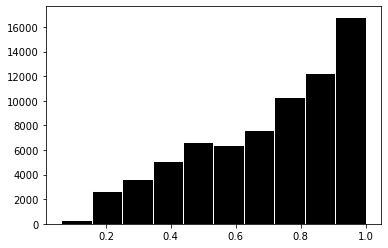

In [20]:
plt.hist(low_map_regions.score, color='black', edgecolor='white')
plt.show

In [21]:
under05_map_regions = low_map_regions[low_map_regions.score < 0.5].reset_index(drop=True)
under05_map_regions.head()

,chrom,start,stop,score
0,NC_000962.3,103772,103773,0.496667
1,NC_000962.3,103773,103774,0.493333
2,NC_000962.3,103774,103775,0.490000
3,NC_000962.3,103775,103776,0.485000
4,NC_000962.3,103776,103777,0.480000


#### How many of the previously used low mappability mutations are in our current list

In [22]:
under05_map_regions.shape

(16228, 4)

In [33]:
count = 0
for i in under05_map_regions.index:
    ix = under05_map_regions.loc[i, "start"]
    if ix in lowmap_subst_ix_list:
        count += 1
        
count/16228

0.26546709391175743

In [34]:
len(lowmap_subst_ix_list)

50305

In [35]:
count = 0
for ix in lowmap_subst_ix_list:
    if ix in under05_map_regions.start.values:
        count += 1
        
count/50305

0.08563761057548952

## Mutate at DR positions, low mappability positions and homopolymer positions

In [2]:
summary_dir = "./mutant_summaries_final"
fasta_dir = "./fastas_final"

In [14]:
for mut_i in range(1, 11):
    
    HT_insert_ix_base_list = []

    for i in homopolymer_DR_af.index:

        insert_ix, base = homopolymer_DR_af.loc[i, "H37Rv Start"], homopolymer_DR_af.loc[i, "polyNT"][0]
        h37rv_ix = insert_ix

        HT_insert_ix_base_list.append((insert_ix, h37rv_ix, base))
    
    mutated_ix = []
        
    mutant_df = pd.DataFrame(columns=["POS", "REF", "ALT", "TYPE"])
    df_i = 0
        
    seq_array_main = [x for x in h37rv_seq]

    ## DR mutations
    mut_type = 'DR'

    random.shuffle(DR_subst_ix_base_list)

    mutation_ix = 0

    while len(mutated_ix) < 20:

        DR_mut_ix, DR_mut = DR_subst_ix_base_list[mutation_ix][0], DR_subst_ix_base_list[mutation_ix][1]

        if not ((DR_mut_ix in mutated_ix) or (DR_mut_ix-1 in mutated_ix) or (DR_mut_ix+1 in mutated_ix)):

            ref_base = h37rv_seq[DR_mut_ix]

            mutated_ix.append(DR_mut_ix)

            mutant_df.loc[df_i] = [DR_mut_ix+1,ref_base,DR_mut,mut_type]
            df_i += 1

            seq_array_main[DR_mut_ix] = DR_mut

        mutation_ix += 1


    ## low mappability mutations
    mut_type = 'low_map'

    random.shuffle(lowmap_subst_ix_list)

    mutation_ix = 0

    while len(mutated_ix) < 40:

        low_map_mut_ix = lowmap_subst_ix_list[mutation_ix]
        
        if not ((low_map_mut_ix in mutated_ix) or (low_map_mut_ix-1 in mutated_ix) or (low_map_mut_ix+1 in mutated_ix)):

            ref_base = h37rv_seq[low_map_mut_ix]

            low_map_mut = mutate(ref_base)

            mutated_ix.append(low_map_mut_ix)

            mutant_df.loc[df_i] = [low_map_mut_ix+1,ref_base,low_map_mut,mut_type]
            df_i += 1

            seq_array_main[low_map_mut_ix] = low_map_mut

        mutation_ix += 1

    ## HT mutations
    mut_type = 'HT'

    random.shuffle(HT_insert_ix_base_list)

    mutation_ix = 0

    while len(mutated_ix) < 50:

        HT_mut_ix, h37rv_ix, HT_base = HT_insert_ix_base_list[mutation_ix][0], HT_insert_ix_base_list[mutation_ix][1], HT_insert_ix_base_list[mutation_ix][2]

        if h37rv_ix not in mutated_ix:

            ref_base_prev = seq_array_main[HT_mut_ix-1]

            mutated_ix.append(h37rv_ix)

            mutant_df.loc[df_i] = [h37rv_ix,ref_base_prev,ref_base_prev+HT_base,mut_type]
            df_i += 1

            seq_array_main.insert(HT_mut_ix, HT_base)
            
            for tuple_i in range(mutation_ix+1, len(HT_insert_ix_base_list)):
                if HT_insert_ix_base_list[tuple_i][0] > HT_mut_ix:
                    HT_insert_ix_base_list[tuple_i] = (HT_insert_ix_base_list[tuple_i][0] + 1, HT_insert_ix_base_list[tuple_i][1], HT_insert_ix_base_list[tuple_i][2])
            
        mutation_ix += 1
        
    mutant_df.sort_values("POS", ascending=True, inplace=True)
    mutant_df.to_csv("{}/mutant_{}.csv".format(summary_dir, mut_i), index=False)
    
    mut_seq_main = "".join(seq_array_main)
    
    assert(len(set(mutated_ix)) == len(mutated_ix))

    out_dir = "{}/h37rv_mutant_{}".format(fasta_dir, mut_i)
    if not os.path.isdir(out_dir):
        os.makedirs(out_dir)
    
    with open("{}/h37rv_mutant_{}.fasta".format(out_dir, mut_i), "w") as out_f:
        out_f.write(">NC_000962.3-mutant-{}\n".format(mut_i))
        n_chunks = len(mut_seq_main)//80
        for i in range(n_chunks):
            out_f.write(mut_seq_main[i*80:i*80+80] + "\n")
        out_f.write(mut_seq_main[(i+1)*80:] + "\n")
        
    
    
    

In [4]:
for mutant_num in range(1, 11):
    
    mutant_df = pd.read_csv("{}/mutant_{}.csv".format(summary_dir, mutant_num))
    
    print(len(mutant_df.POS.unique()))

50
50
50
50
50
50
50
50
50
50


# Number of unique positions

In [3]:
all_positions = []

for mutant_num in range(1, 11):

    mutant_df = pd.read_csv("./mutant_summaries_final/mutant_{}.csv".format(mutant_num))

    positions = list(mutant_df.POS.values)
    all_positions += positions

len(set(all_positions))

369

In [4]:
L1234_mutant_df = pd.read_csv("./lineage123/mutant_summaries_final/L123_mutant.csv")
L1234_positions = list(L1234_mutant_df.POS.values)

all_positions += L1234_positions

len(set(all_positions))

378